# 5 非线性模型

In [1]:
# 使用Wage数据集进行进行分析
library(ISLR)
attach(Wage)

Warning message:
"package 'ISLR' was built under R version 3.3.3"

## 5.1 多项式回归和阶梯函数

### 5.1.1 多项式回归

In [2]:
# 利用poly()函数拟合4阶多项式模型，poly(age, 4)返回age的4阶正交多项式，即矩阵的每一列都是age,age^2,age^3,age^4的线性组合
fit=lm(wage~poly(age,4),data=Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287409,153.283015,0.000000e+00
"poly(age, 4)1",447.06785,39.9147851,11.200558,1.484604e-28
"poly(age, 4)2",-478.31581,39.9147851,-11.983424,2.355831e-32
"poly(age, 4)3",125.52169,39.9147851,3.144742,1.678622e-03
"poly(age, 4)4",-77.91118,39.9147851,-1.951938,5.103865e-02


In [3]:
# 也可以使用poly()函数直接估计age,age^2,age^3,age^4的系数
# 添加raw=TRUE参数，只会影响系数的估计，不会影响拟合的结果
fit2=lm(wage~poly(age,4,raw=T),data=Wage)
coef(summary(fit2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
"poly(age, 4, raw = T)1",2.124552e+01,5.886748e+00,3.609042,0.0003123618
"poly(age, 4, raw = T)2",-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
"poly(age, 4, raw = T)3",6.810688e-03,3.065931e-03,2.221409,0.0263977518
"poly(age, 4, raw = T)4",-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


In [4]:
# 还可以使用封装函数I()将类似于age^2这样的项封装起来，估计age,age^2,age^3,age^4的系数
fit2a=lm(wage~age+I(age^2)+I(age^3)+I(age^4),data=Wage)
coef(summary(fit2a))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
age,2.124552e+01,5.886748e+00,3.609042,0.0003123618
I(age^2),-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
I(age^3),6.810688e-03,3.065931e-03,2.221409,0.0263977518
I(age^4),-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


In [5]:
# 使用cbind()函数将一系列向量构造成矩阵，函数内的表达式也是内封装的
fit2b=lm(wage~cbind(age,age^2,age^3,age^4),data=Wage)
coef(summary(fit2b))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
"cbind(age, age^2, age^3, age^4)age",2.124552e+01,5.886748e+00,3.609042,0.0003123618
"cbind(age, age^2, age^3, age^4)",-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
"cbind(age, age^2, age^3, age^4)",6.810688e-03,3.065931e-03,2.221409,0.0263977518
"cbind(age, age^2, age^3, age^4)",-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


In [6]:
# 构造一组age值，使用predict()函数预测，并给出相应的标准差
agelims=range(age)
age.grid=seq(from=agelims[1],to=agelims[2])
preds=predict(fit,newdata=list(age=age.grid),se=TRUE)
se.bands=cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit)

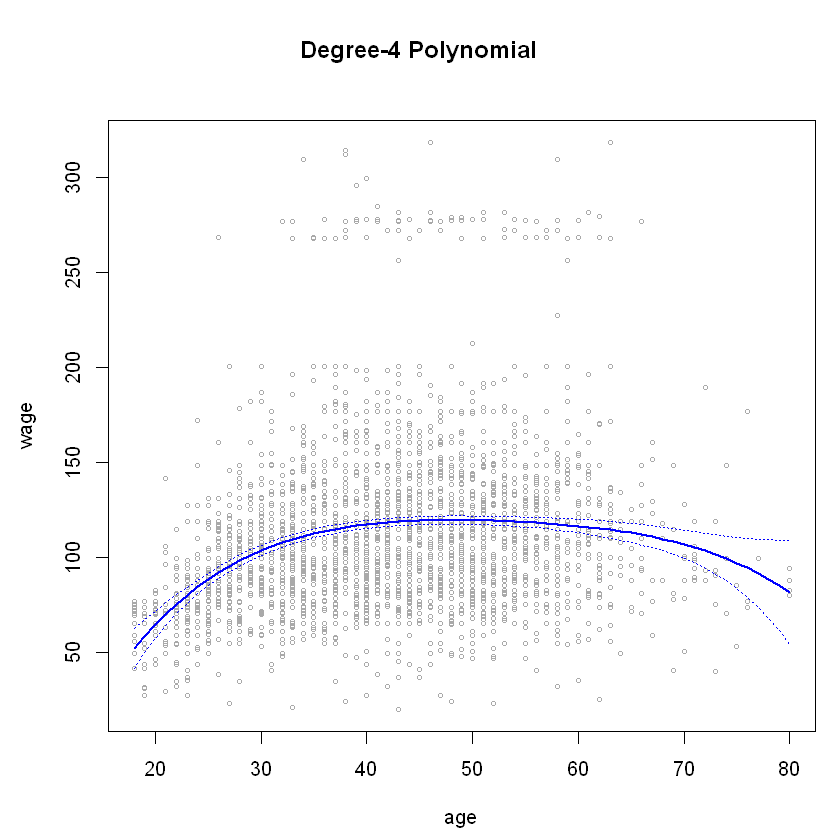

In [7]:
# 画出数据散点图并给出4次多项式的拟合结果
# par()函数中的mar和oma参数能调整图的边界
par(mfrow=c(1,1),mar=c(4.5,4.5,1,1),oma=c(0,0,4,0))
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
title("Degree-4 Polynomial",outer=T)
lines(age.grid,preds$fit,lwd=2,col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

In [8]:
# 正如前面所说，利用poly()函数拟合高阶多项式回归，生成正交多项式或者设置raw=TRUE，并不影响模型的拟合结果，即模型的拟合值是相同的
preds2=predict(fit2,newdata=list(age=age.grid),se=TRUE)
max(abs(preds$fit-preds2$fit))

[1] 7.81597e-11

In [9]:
# 通过假设检验来确定多项式的次数，可以依次拟合线性模型到5次多项式模型，从而确定能够解释wage和age之间关系的最简单的模型
# anova()函数实现方差分析，可以比较模型M1是不是比一个更复杂的模型M2更优（原假设是M1比M2更优）
# anova()函数中M1和M2必须有包含关系，M1的预测变量必须是M2预测变量的子集
# 通过观察p值可以看到，M4对应的p值在0.05上下，M5对应的p值为0.37，因此二次或三次多项式回归模型比较合适，更高或更低阶的模型不合适
fit.1=lm(wage~age,data=Wage)
fit.2=lm(wage~poly(age,2),data=Wage)
fit.3=lm(wage~poly(age,3),data=Wage)
fit.4=lm(wage~poly(age,4),data=Wage)
fit.5=lm(wage~poly(age,5),data=Wage)
anova(fit.1,fit.2,fit.3,fit.4,fit.5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2998,5022216,NA,NA,NA,NA
2997,4793430,1,228786.010,143.5931074,2.367734e-32
2996,4777674,1,15755.694,9.8887559,1.679213e-03
2995,4771604,1,6070.152,3.8098134,5.104623e-02
2994,4770322,1,1282.563,0.8049758,3.696820e-01


In [10]:
# 用poly()函数产生正交多项式时，得到的p值和anova()的结果一样
coef(summary(fit.5))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287647,153.2780243,0.000000e+00
"poly(age, 5)1",447.06785,39.9160847,11.2001930,1.491111e-28
"poly(age, 5)2",-478.31581,39.9160847,-11.9830341,2.367734e-32
"poly(age, 5)3",125.52169,39.9160847,3.1446392,1.679213e-03
"poly(age, 5)4",-77.91118,39.9160847,-1.9518743,5.104623e-02
"poly(age, 5)5",-35.81289,39.9160847,-0.8972045,3.696820e-01


In [11]:
# p值和anova()的结果一致，原因是t统计量和anova()函数得到的F统计量是一致的
# 以二阶的t值和F值为例进行比较
(-11.983)^2

[1] 143.5923

In [12]:
# anova()函数在模型中有其他项的时候也同样有效
fit.1=lm(wage~education+age,data=Wage)
fit.2=lm(wage~education+poly(age,2),data=Wage)
fit.3=lm(wage~education+poly(age,3),data=Wage)
anova(fit.1,fit.2,fit.3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2994,3867992,NA,NA,NA,NA
2993,3725395,1,142597.10,114.696898,2.728971e-26
2992,3719809,1,5586.66,4.493588,3.410431e-02


### 还可以使用交叉验证来选择合适的多项式阶数

In [13]:
# 利用高阶多项式拟合逻辑回归，预测收入是否会超过250000美元
# 应用glm()函数和family="binomial"参数拟合逻辑回归时，需要生成响应变量
# 可以使用I()函数生成二元响应变量，I()函数生成TRUE和FALSE的逻辑变量，glm()自动转化为1和0
fit=glm(I(wage>250)~poly(age,4),data=Wage,family=binomial)

In [14]:
# 使用predict()进行预测
preds=predict(fit,newdata=list(age=age.grid),se=T)

In [15]:
# glm()函数默认预测类型是type="link"，输出的预测结果是Xp，而非P(Y=1|X)
# 所以需要手动进行如下转换
pfit=exp(preds$fit)/(1+exp(preds$fit))
se.bands.logit = cbind(preds$fit+2*preds$se.fit, preds$fit-2*preds$se.fit)
se.bands = exp(se.bands.logit)/(1+exp(se.bands.logit))

In [16]:
# 也可以设置type="response"直接得到P(Y=1|X)和置信区间
# 逻辑回归的置信区间有时候没有意义，因为会得到负概率
preds=predict(fit,newdata=list(age=age.grid),type="response",se=T)

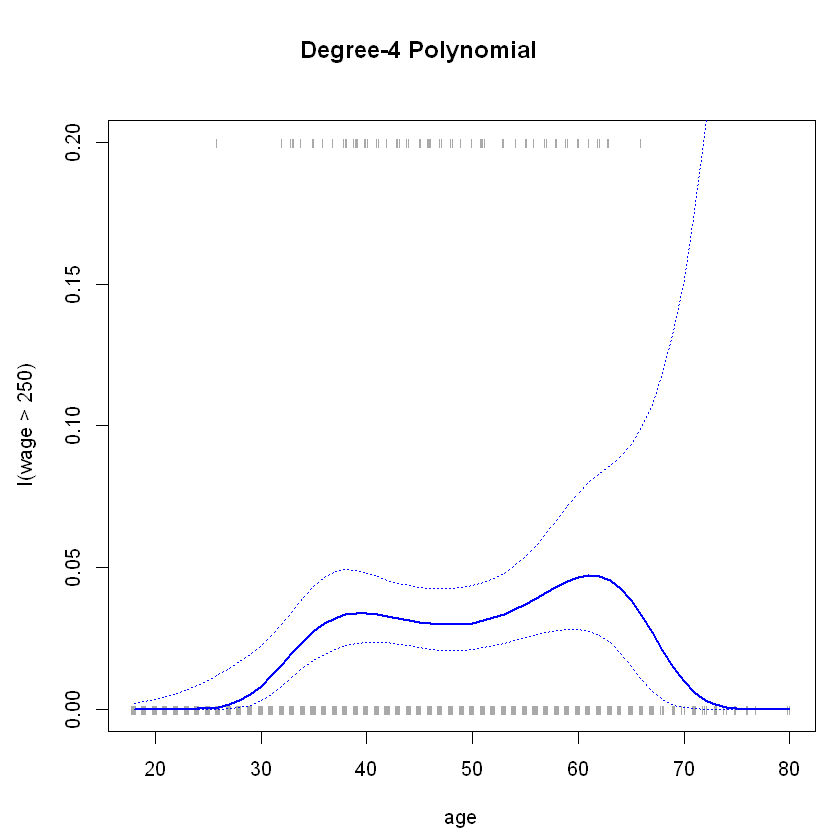

In [17]:
# 画出数据散点图并给出4次多项式的拟合结果
par(mfrow=c(1,1),mar=c(4.5,4.5,1,1),oma=c(0,0,4,0))
plot(age,I(wage>250),xlim=agelims,type="n",ylim=c(0,.2))
points(jitter(age), I((wage>250)/5),cex=.5,pch="|",col="darkgrey")
title("Degree-4 Polynomial",outer=T)
lines(age.grid,pfit,lwd=2, col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

### 5.1.2 阶梯函数

In [18]:
# 在拟合阶梯函数之前，对数据用cut()进行处理
table(cut(age,4))


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

In [19]:
# 拟合阶梯函数
# cut()函数会自动等距离选择分割点，也可以用breaks参数手动选择分割点
# cut()会返回有序的分类变量，lm()会据此生成一系列哑变量进行回归
fit=lm(wage~cut(age,4),data=Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),94.158392,1.476069,63.789970,0.000000e+00
"cut(age, 4)(33.5,49]",24.053491,1.829431,13.148074,1.982315e-38
"cut(age, 4)(49,64.5]",23.664559,2.067958,11.443444,1.040750e-29
"cut(age, 4)(64.5,80.1]",7.640592,4.987424,1.531972,1.256350e-01


In [20]:
# 使用predict()函数预测，并给出相应的标准差
preds=predict(fit,newdata=list(age=age.grid),se=TRUE)
se.bands=cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit)

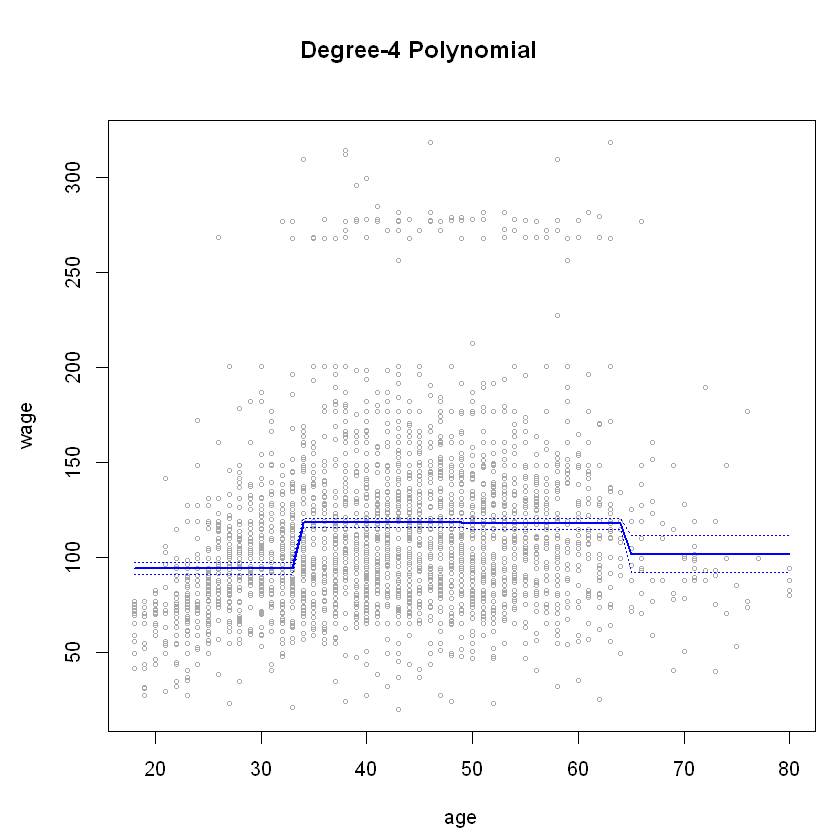

In [21]:
# 画出数据散点图并给出4次多项式的拟合结果
par(mfrow=c(1,1),mar=c(4.5,4.5,1,1),oma=c(0,0,4,0))
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
title("Degree-4 Polynomial",outer=T)
lines(age.grid,preds$fit,lwd=2,col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

## 5.2 样条

In [22]:
library(splines)

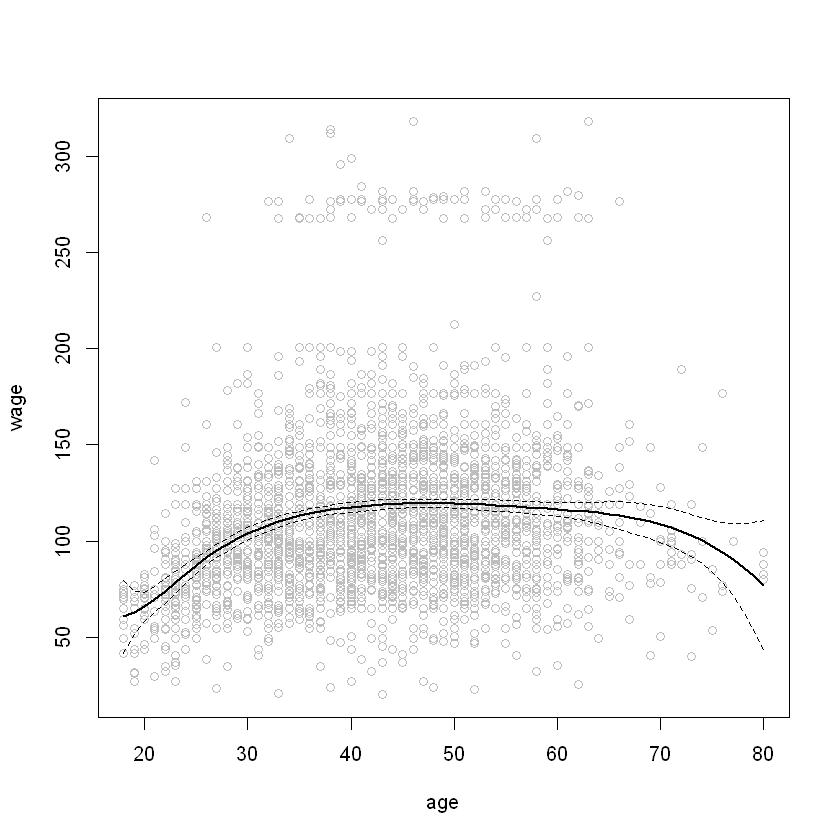

In [23]:
# 回归样条是通过构建一个合适的基函数矩阵来拟合的，bs()函数能用来产生针对给定结点的所有样条基函数的矩阵
# bs()默认生成三次样条
# wage对age的回归样条
fit=lm(wage~bs(age,knots=c(25,40,60)),data=Wage)
pred=predict(fit,newdata=list(age=age.grid),se=T)
plot(age,wage,col="gray")
lines(age.grid,pred$fit,lwd=2)
lines(age.grid,pred$fit+2*pred$se,lty="dashed")
lines(age.grid,pred$fit-2*pred$se,lty="dashed")

In [24]:
# 结点设定为25、40、60，会生成6个样条基函数
# 3个结点的3次样条有7个自由度，这些自由度通过截距项加6个样条基函数实现
dim(bs(age,knots=c(25,40,60)))
dim(bs(age,df=6))

[1] 3000    6

[1] 3000    6

In [25]:
# R选择33.8、42.0、51.0为结点，对应于age的25%、50%、75%分位数
# bs()函数的df参数可以选择样条的自由度，degree参数选择样条的阶数（默认阶数为3阶）
attr(bs(age,df=6),"knots")

25%   50%   75% 
33.75 42.00 51.00

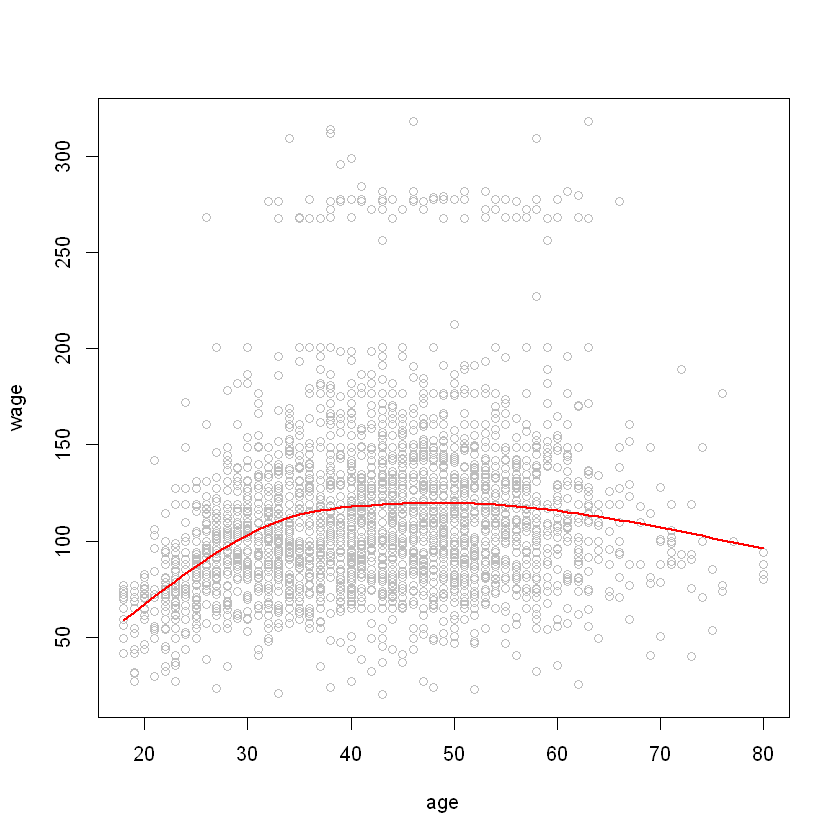

In [26]:
# 自然样条可以通过ns()函数得到
# ns()函数的knots参数可以手动确定结点
# 拟合自由度为4的自然样条
fit2=lm(wage~ns(age,df=4),data=Wage)
pred2=predict(fit2,newdata=list(age=age.grid),se=T)
plot(age,wage,col="gray")
lines(age.grid, pred2$fit,col="red",lwd=2)

Warning message in smooth.spline(age, wage, cv = TRUE):
"cross-validation with non-unique 'x' values seems doubtful"

[1] 6.794596

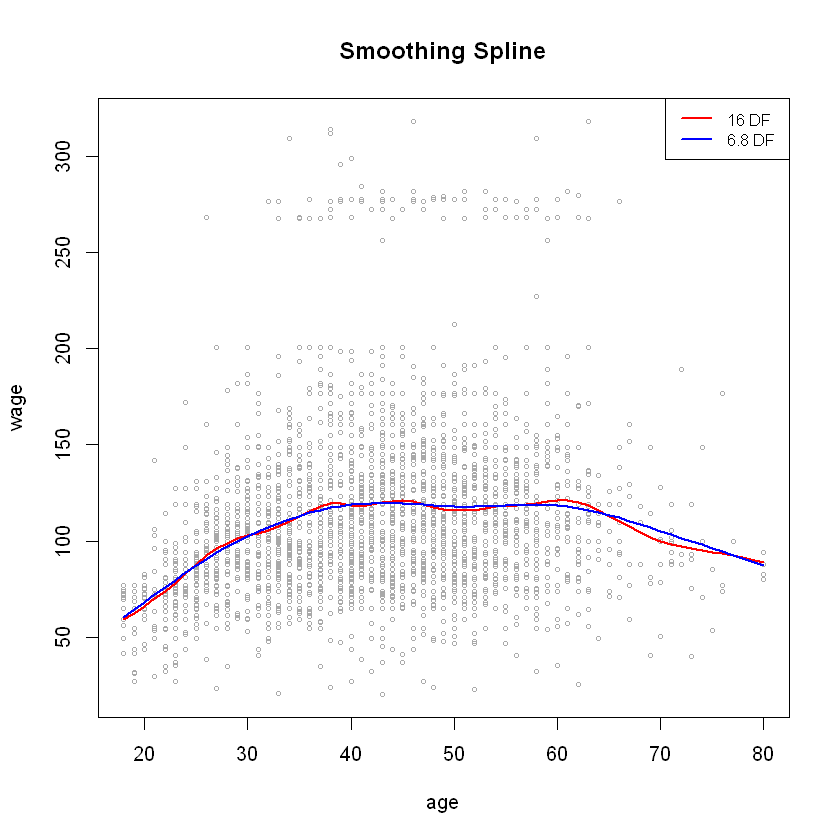

In [27]:
# 光滑样条可以通过smooth.spline()函数得到
# 设置cv=TRUE，通过交叉验证选择合适的自由度，确定自由度为6.8
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
title("Smoothing Spline")
fit=smooth.spline(age,wage,df=16)
fit2=smooth.spline(age,wage,cv=TRUE)
fit2$df
lines(fit,col="red",lwd=2)
lines(fit2,col="blue",lwd=2)
legend("topright",legend=c("16 DF","6.8 DF"),col=c("red","blue"),lty=1,lwd=2,cex=.8)

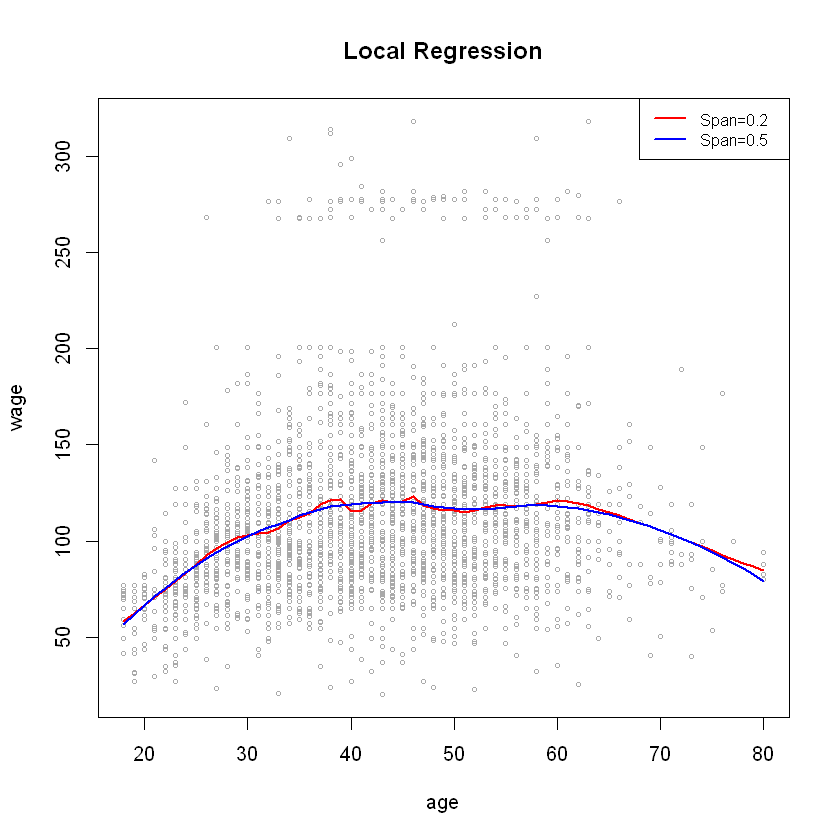

In [28]:
# 局部回归可以通过loess()函数得到（R中的locfit包也可以用于拟合局部回归模型）
# span=0.2和span=0.5，代表局部回归时使用了预测点的领域分别囊括了20%和50%的数据
# span越大拟合结果越光滑
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
title("Local Regression")
fit=loess(wage~age,span=.2,data=Wage)
fit2=loess(wage~age,span=.5,data=Wage)
lines(age.grid,predict(fit,data.frame(age=age.grid)),col="red",lwd=2)
lines(age.grid,predict(fit2,data.frame(age=age.grid)),col="blue",lwd=2)
legend("topright",legend=c("Span=0.2","Span=0.5"),col=c("red","blue"),lty=1,lwd=2,cex=.8)

## 5.3 GAM

In [29]:
# 应用光滑样条或其他不能表示成基函数的模型和最小二乘法来拟合GAM时，可以使用R中的gam库
library(gam)

Warning message:
"package 'gam' was built under R version 3.3.3"Loading required package: foreach
Loaded gam 1.14



In [30]:
# 自然样条可以被表示成基函数，所以使用lm()函数，就可以对year和age的自然样条函数和education作为预测变量拟合广义可加模型
gam1=lm(wage~ns(year,4)+ns(age,5)+education,data=Wage)

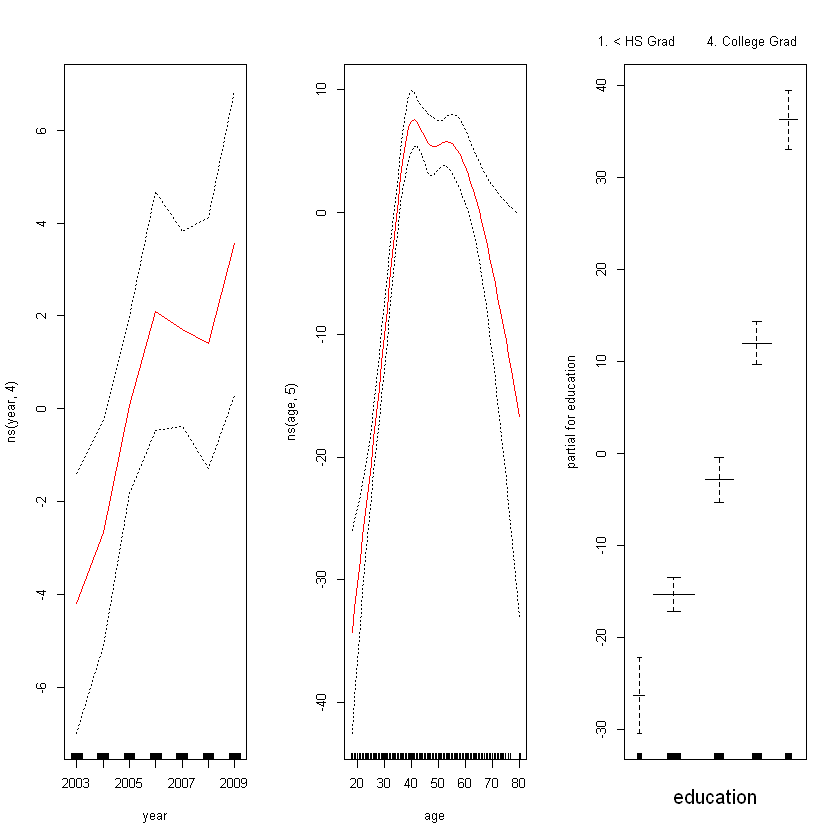

In [31]:
# plot.gam()函数可以绘制广义可加模型的拟合结果
par(mfrow=c(1,3))
plot.gam(gam1, se=TRUE, col="red")

In [32]:
# gam库中的s()函数能够用来拟合光滑样条，education是定性变量，模型将其自动转化成4个哑变量
gam.m3=gam(wage~s(year,4)+s(age,5)+education,data=Wage)

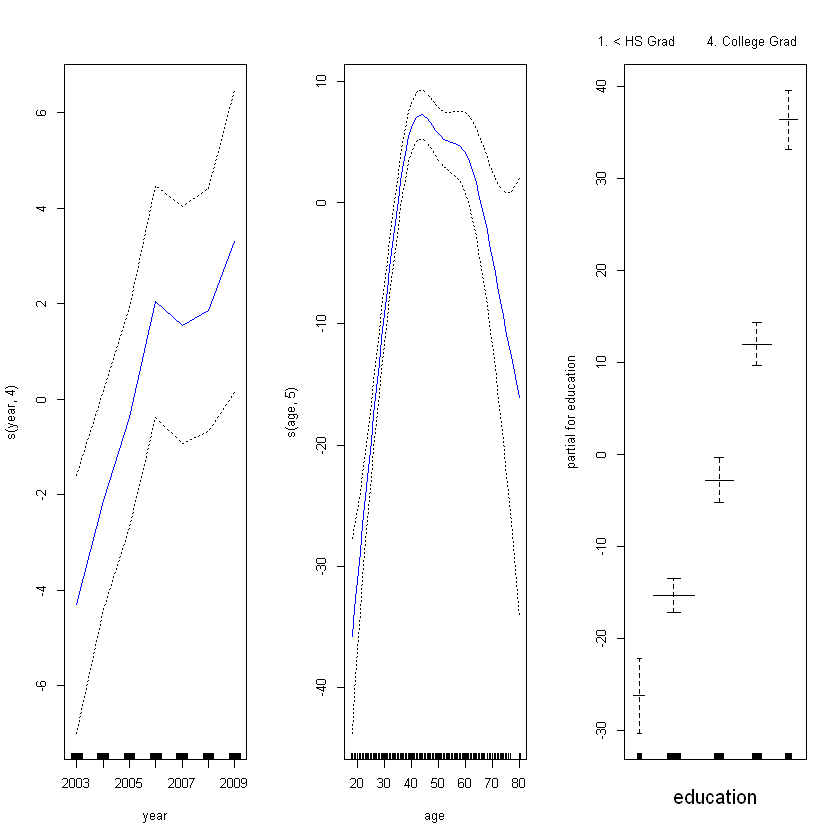

In [33]:
# plot()函数可以识别出gam.m3是gam类的对象，自动调用plot.gam()绘制拟合结果
par(mfrow=c(1,3))
plot(gam.m3, se=TRUE,col="blue")

In [34]:
# 进行ANOVA检验，确定三种模型中哪个最好：不包含year的GAM（M1）、包含year的线性函数的GAM（M2）、包含year的样条函数的GAM（M3）
# ANOVA的结果显示M2是最好的
gam.m1=gam(wage~s(age,5)+education,data=Wage)
gam.m2=gam(wage~year+s(age,5)+education,data=Wage)
gam.m3=gam(wage~s(year,4)+s(age,5)+education,data=Wage)
anova(gam.m1,gam.m2,gam.m3,test="F")

Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
2990,3711731,NA,NA,NA,NA
2989,3693842,1.000000,17889.243,14.477130,0.0001447167
2986,3689770,2.999989,4071.134,1.098212,0.3485661430


In [35]:
# year和age的p值分别对应着零假设为线性关系、备择假设为非线性关系的比较
# Anova for Nonparametric Effects中year的p值越大，表示从ANOVA检验中得到的year为非线性关系的结论越可信；age的p值表示非线性关系更合适
summary(gam.m3)


Call: gam(formula = wage ~ s(year, 4) + s(age, 5) + education, data = Wage)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-119.43  -19.70   -3.33   14.17  213.48 

(Dispersion Parameter for gaussian family taken to be 1235.69)

    Null Deviance: 5222086 on 2999 degrees of freedom
Residual Deviance: 3689770 on 2986 degrees of freedom
AIC: 29887.75 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
             Df  Sum Sq Mean Sq F value    Pr(>F)    
s(year, 4)    1   27162   27162  21.981 2.877e-06 ***
s(age, 5)     1  195338  195338 158.081 < 2.2e-16 ***
education     4 1069726  267432 216.423 < 2.2e-16 ***
Residuals  2986 3689770    1236                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova for Nonparametric Effects
            Npar Df Npar F  Pr(F)    
(Intercept)                          
s(year, 4)        3  1.086 0.3537    
s(age, 5)         4 32.380 <2e-16 ***
education                            
---

In [36]:
# 使用predict()在训练集上预测
preds=predict(gam.m2,newdata=Wage)

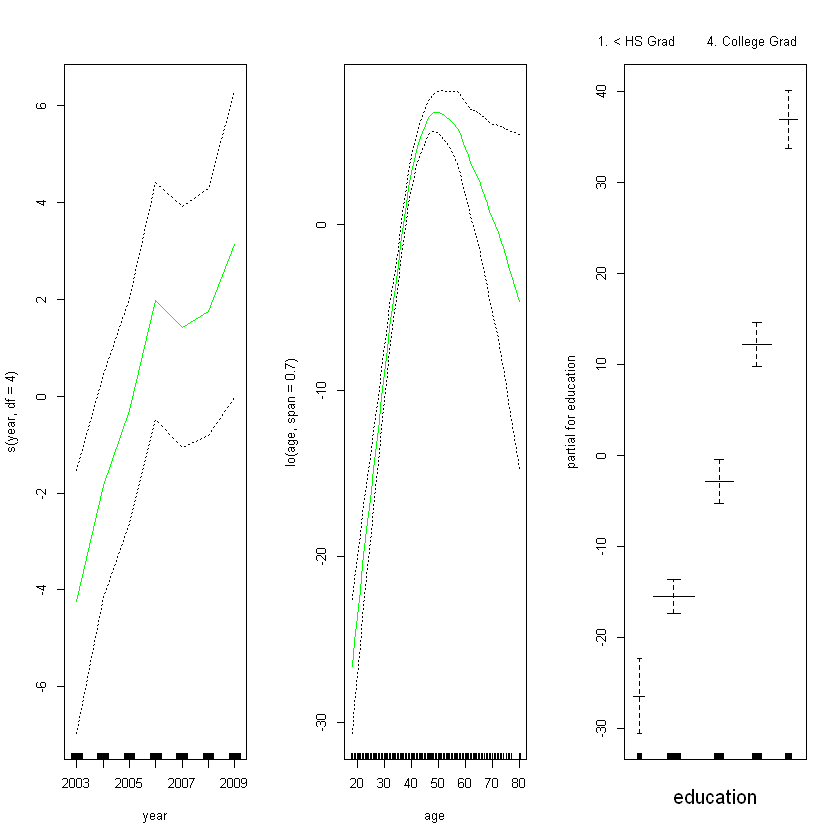

In [37]:
# 可以把局部线性回归作为GAM模型的一部分，通过lo()实现
gam.lo=gam(wage~s(year,df=4)+lo(age,span=0.7)+education,data=Wage)

par(mfrow=c(1,3))
plot.gam(gam.lo, se=TRUE, col="green")

In [38]:
# 拟合包含两项的模型，第一项是用lo()函数拟合year和age的交互效应，第二项是定性变量education
gam.lo.i=gam(wage~lo(year,age,span=0.5)+education,data=Wage)

Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"liv too small.    (Discovered by lowesd)"Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"lv too small.     (Discovered by lowesd)"Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"liv too small.    (Discovered by lowesd)"Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
"lv too small.     (Discovered by lowesd)"

Warning message:
"package 'akima' was built under R version 3.3.3"

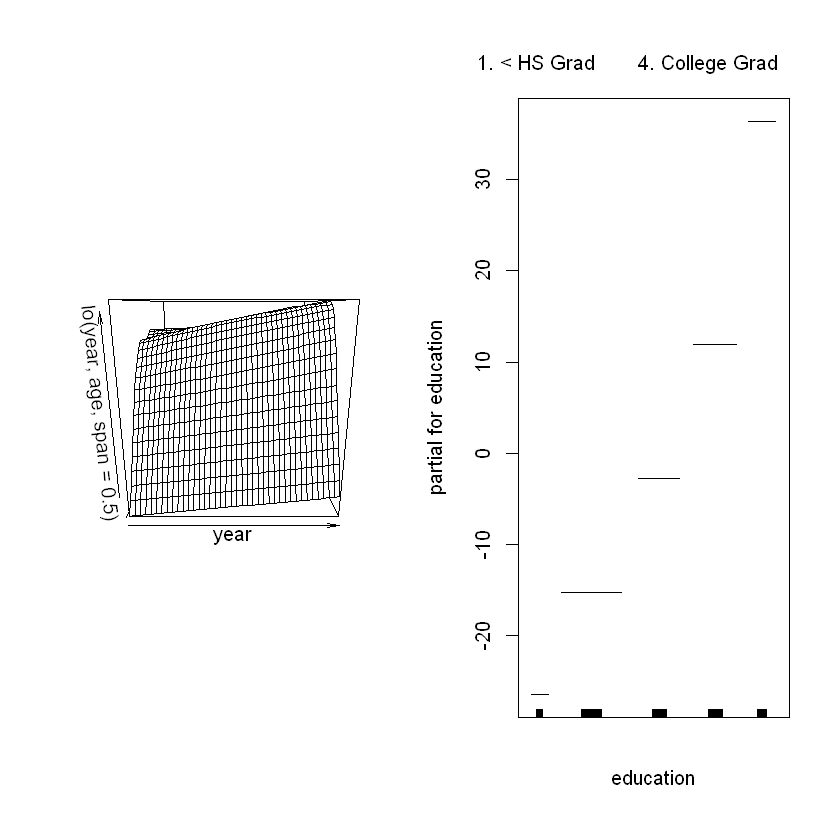

In [39]:
# akima包可以展现交互项的二维曲面拟合效果
library(akima)

par(mfrow=c(1,2))
plot(gam.lo.i)

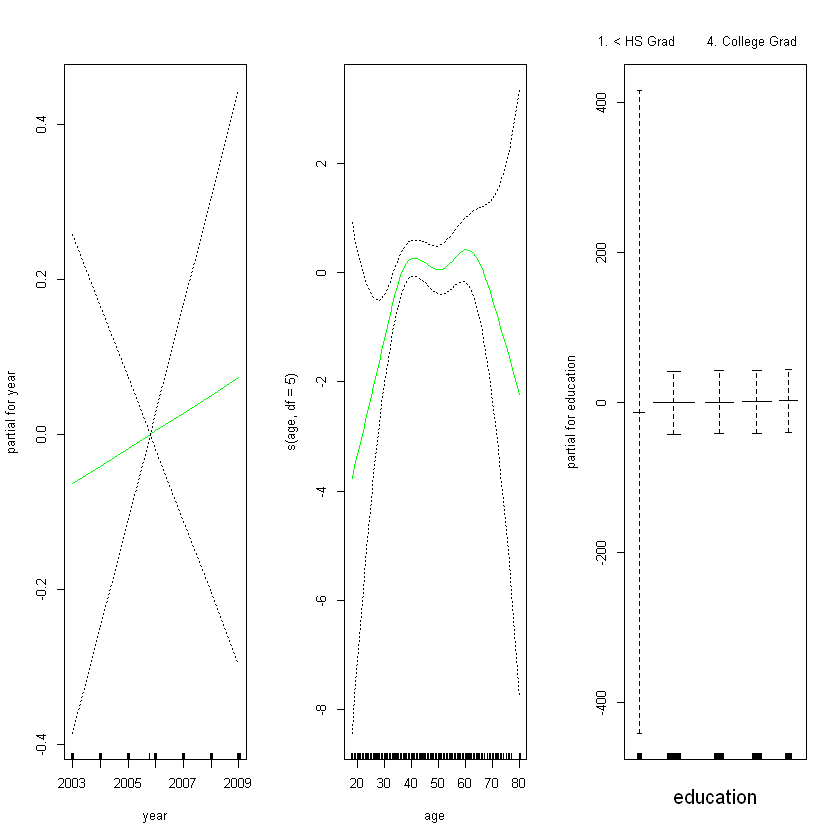

In [40]:
# 对于逻辑回归GAM，可以用I()函数生成二元响应变量，设置family=binomial
gam.lr=gam(I(wage>250)~year+s(age,df=5)+education,family=binomial,data=Wage)

par(mfrow=c(1,3))
plot(gam.lr,se=T,col="green")

In [41]:
# 在HS类中没有高收入者
table(education,I(wage>250))

                    
education            FALSE TRUE
  1. < HS Grad         268    0
  2. HS Grad           966    5
  3. Some College      643    7
  4. College Grad      663   22
  5. Advanced Degree   381   45

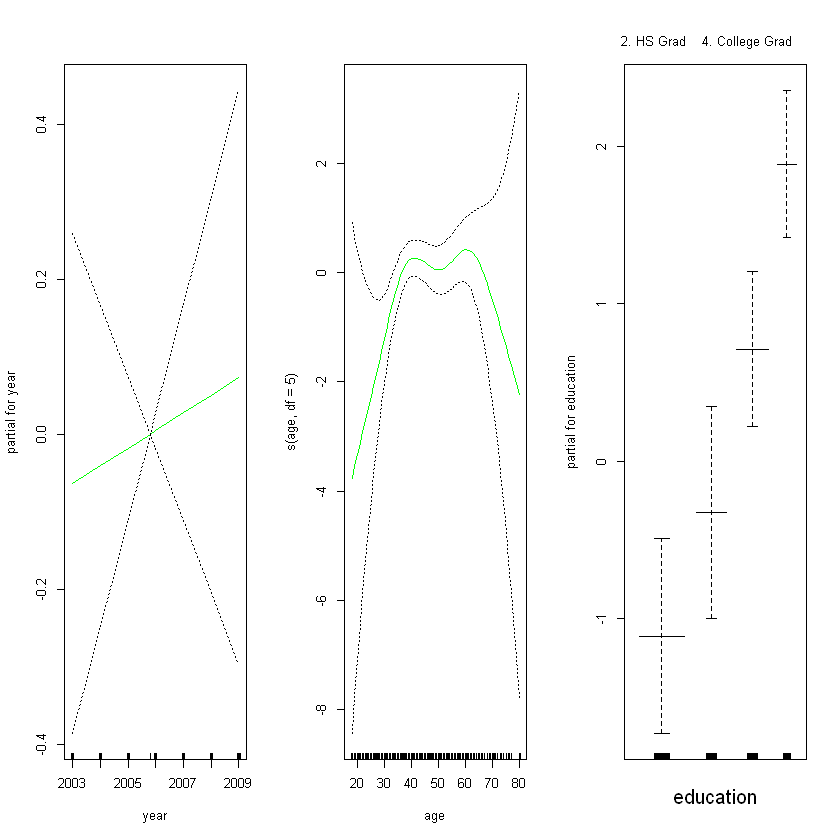

In [42]:
# 在拟合逻辑回归时，剔除HS类，以得到有意义的结果
gam.lr.s=gam(I(wage>250)~year+s(age,df=5)+education,family=binomial,data=Wage,subset=(education!="1. < HS Grad"))

par(mfrow=c(1,3))
plot(gam.lr.s,se=T,col="green")